In [186]:
import importlib
import src.utils as utils
import src.gtfs_handler as gtfs_handler
import src.gps_handler as gps_handler

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from numba import jit

importlib.reload(utils)
importlib.reload(gtfs_handler)
importlib.reload(gps_handler)


<module 'src.gps_handler' from 'c:\\Users\\almir\\OneDrive\\Área de Trabalho\\FGV\\5° Período\\Field\\smtr_previsao_tempo_chegada\\fgv\\src\\gps_handler.py'>

In [187]:
# Define the paths to the GTFS and GPS data
GTFS_FOLDER = "./data/gtfs_data"
GPS_FOLDER = "./data/gps_data"

# Define the route to be analyzed
ROUTE = "409"
VEHICLE = "A71505"

In [188]:
# Create the GTFS and GPS handlers
gtfs = gtfs_handler.GTFSHandler(GTFS_FOLDER)
gps = gps_handler.GPSHandler(GPS_FOLDER)

GTFS data loaded successfully!
Loading GPS data from 1 CSV files...
GPS data loaded successfully!


In [189]:
gtfs.filter_by_route(ROUTE)

print("Route stops:")
gtfs.route_stops

Route stops:


,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


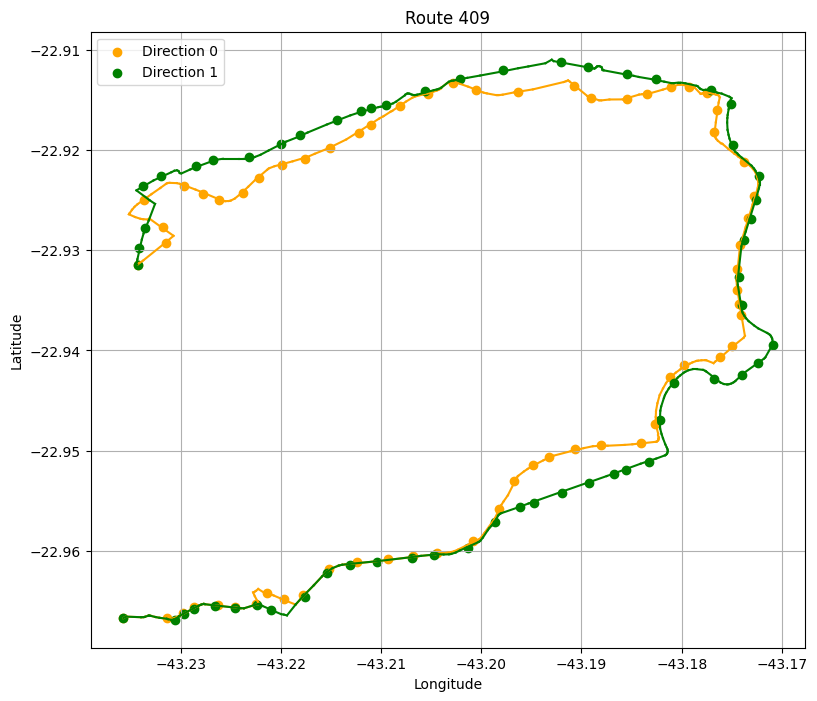

In [190]:
# Plot the route and the stops, colored by the direction
gtfs.plot_route("Route 409")

In [191]:
gps.show_routes()

servico
409    72486
Name: count, dtype: int64
Found 1 routes:
[409]


array([409], dtype=int64)

In [192]:
gps.get_route_data(409)

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,velocidade_instantanea,velocidade_estimada_10_min,distancia
0,2024-02-22 00:00:23,2024-02-22,00:00:23,A71518,409,-22.88896,-43.29308,False,garagem,Parado garagem,0,0.0,NaN
1,2024-02-22 00:00:32,2024-02-22,00:00:32,A71546,409,-22.88924,-43.29237,False,garagem,Parado garagem,0,0.0,NaN
2,2024-02-22 00:00:37,2024-02-22,00:00:37,A71509,409,-22.89004,-43.29189,False,garagem,Parado garagem,0,0.0,NaN
3,2024-02-22 00:00:38,2024-02-22,00:00:38,A71553,409,-22.88931,-43.29190,False,garagem,Parado garagem,0,0.0,NaN
4,2024-02-22 00:00:39,2024-02-22,00:00:39,A71545,409,-22.88846,-43.29280,False,garagem,Parado garagem,0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72481,2024-02-22 23:58:27,2024-02-22,23:58:27,A71587,409,-22.88926,-43.29243,False,garagem,Parado garagem,0,0.0,0.000000
72482,2024-02-22 23:58:57,2024-02-22,23:58:57,A71587,409,-22.88926,-43.29243,False,garagem,Parado garagem,0,0.0,0.000000
72483,2024-02-22 23:59:01,2024-02-22,23:59:01,A71531,409,-22.88879,-43.29315,False,garagem,Parado garagem,0,0.0,2.223902
72484,2024-02-22 23:59:27,2024-02-22,23:59:27,A71587,409,-22.88926,-43.29243,False,garagem,Parado garagem,0,0.0,0.000000


In [193]:
gps.show_buses(ROUTE, filter_min=1000, filter_max=2880)

Route 409 has 20/32 elegible buses:
['A71509', 'A71553', 'A71550', 'A71541', 'A71502', 'A71587', 'A71531', 'A71577', 'A71576', 'A71565', 'A71505', 'A71555', 'A71515', 'A71579', 'A71527', 'A71508', 'A71533', 'A71551', 'A71522', 'A71503']


['A71509',
 'A71553',
 'A71550',
 'A71541',
 'A71502',
 'A71587',
 'A71531',
 'A71577',
 'A71576',
 'A71565',
 'A71505',
 'A71555',
 'A71515',
 'A71579',
 'A71527',
 'A71508',
 'A71533',
 'A71551',
 'A71522',
 'A71503']

In [194]:
# Filter the data according to the vehicle id
gps.get_bus_data(VEHICLE)
gps.gps_df

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,velocidade_instantanea,velocidade_estimada_10_min,distancia
0,2024-02-22 00:10:52,2024-02-22,00:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,NaN
1,2024-02-22 00:40:52,2024-02-22,00:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,0.000000
2,2024-02-22 01:10:52,2024-02-22,01:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,0.000000
3,2024-02-22 01:40:52,2024-02-22,01:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,0.000000
4,2024-02-22 02:10:52,2024-02-22,02:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2024-02-22 22:31:48,2024-02-22,22:31:48,A71505,409,-22.88893,-43.29271,False,garagem,Parado garagem,15,2.7,11.380338
2576,2024-02-22 22:31:51,2024-02-22,22:31:51,A71505,409,-22.88894,-43.29257,True,garagem,Operando fora trajeto,18,3.3,14.384594
2577,2024-02-22 22:32:14,2024-02-22,22:32:14,A71505,409,-22.88902,-43.29242,True,garagem,Operando fora trajeto,0,3.4,17.755114
2578,2024-02-22 23:02:13,2024-02-22,23:02:13,A71505,409,-22.88903,-43.29244,False,garagem,Parado garagem,0,0.0,2.331091


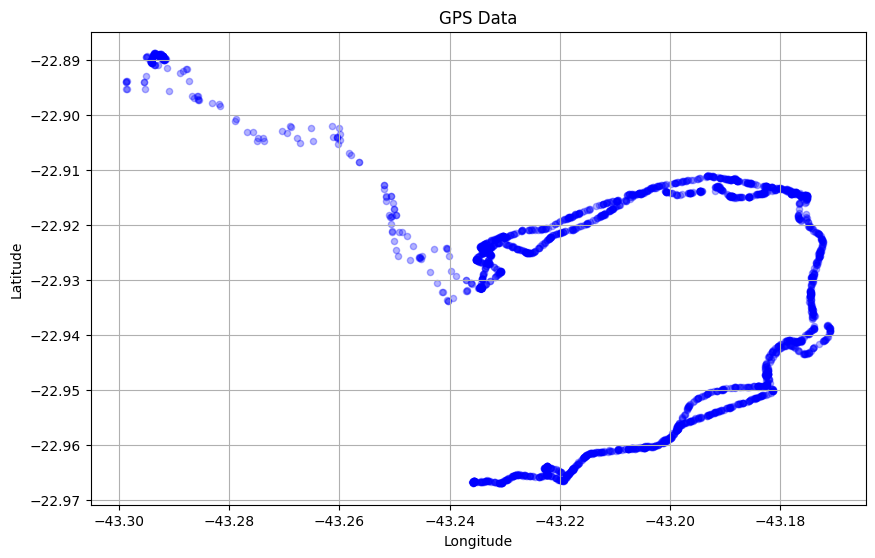

In [195]:
# Plot the gps data as a scatter plot
gps.plot_gps_data()

In [196]:
print(f"EVALUATING {len(gps.gps_df)} gps points over {len(gtfs.route_shape_segments)} route segments")
gps.filter_gps_coordinates(gtfs)
gps.gps_df

print("\nRESULTS AFTER FILTERING")
print(gps.gps_df["in_route"].value_counts())

EVALUATING 2580 gps points over 613 route segments

RESULTS AFTER FILTERING
in_route
True     2355
False     225
Name: count, dtype: int64


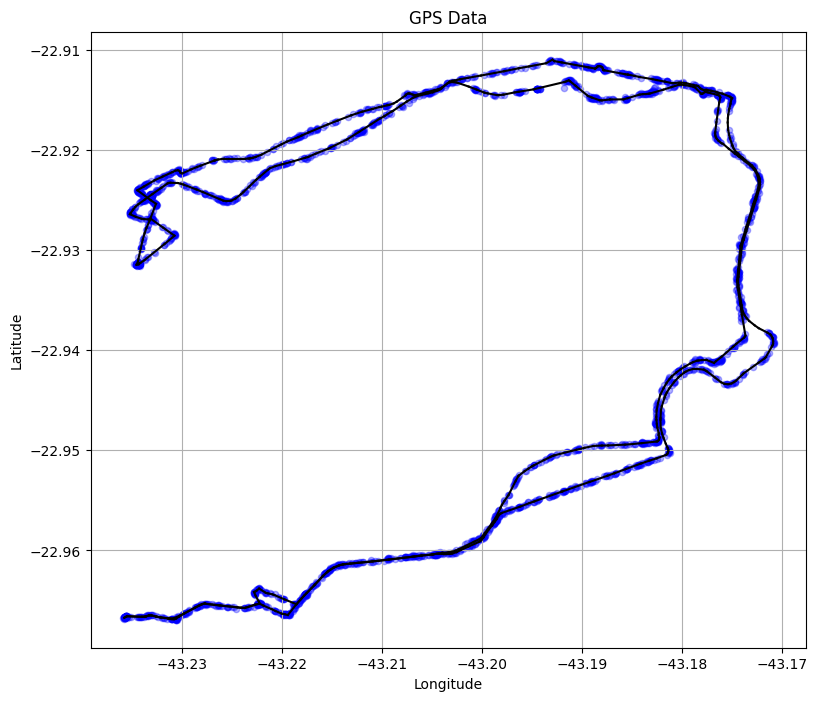

In [197]:
gps.plot_gps_data(gps.gps_df[gps.gps_df["in_route"] == True], gtfs.route_shape_segments)

In [198]:
gps.gps_df[gps.gps_df["in_route"] == True]

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,velocidade_instantanea,velocidade_estimada_10_min,distancia,min_distance_0,closest_segment_index_0,min_distance_1,closest_segment_index_1,in_route
127,2024-02-22 05:21:00,2024-02-22,05:21:00,A71505,409,-22.93147,-43.23429,True,NaN,Operando fora trajeto,0,60.0,188.409359,7.024907,0,7.766971,313,True
128,2024-02-22 05:21:21,2024-02-22,05:21:21,A71505,409,-22.93147,-43.23429,True,NaN,Operando fora trajeto,0,60.0,0.000000,7.024907,0,7.766971,313,True
129,2024-02-22 05:24:01,2024-02-22,05:24:01,A71505,409,-22.93149,-43.23429,True,NaN,Operando fora trajeto,0,24.4,2.223902,8.948439,0,9.149776,313,True
130,2024-02-22 05:24:19,2024-02-22,05:24:19,A71505,409,-22.93145,-43.23428,True,NaN,Operando fora trajeto,6,23.1,4.564175,5.710923,0,7.924648,313,True
131,2024-02-22 05:24:49,2024-02-22,05:24:49,A71505,409,-22.93018,-43.23274,True,NaN,Operando fora trajeto,26,23.3,211.694082,2.120983,4,155.147725,310,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,2024-02-22 21:57:07,2024-02-22,21:57:07,A71505,409,-22.93128,-43.23447,True,NaN,Operando fora trajeto,9,15.1,18.326329,21.564258,0,3.230586,312,True
2478,2024-02-22 21:57:22,2024-02-22,21:57:22,A71505,409,-22.93140,-43.23453,True,NaN,Operando fora trajeto,5,14.4,14.690167,20.642301,0,3.704138,312,True
2479,2024-02-22 21:57:24,2024-02-22,21:57:24,A71505,409,-22.93144,-43.23456,True,NaN,Operando fora trajeto,8,14.1,5.405695,23.354907,0,4.651680,312,True
2480,2024-02-22 21:57:26,2024-02-22,21:57:26,A71505,409,-22.93145,-43.23461,True,NaN,Operando fora trajeto,10,13.9,5.239723,29.346318,0,10.235805,312,True


In [199]:
gtfs.route_stops

,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


In [200]:
gtfs.route_shapes

,shape_id,shape_pt_sequence,shape_pt_lat,shape_pt_lon,shape_dist_traveled
197560,gnoq,1,-22.93143,-43.23435,0.00
197561,gnoq,2,-22.93139,-43.23428,8.44
197562,gnoq,3,-22.93133,-43.23424,16.27
197563,gnoq,4,-22.93128,-43.23414,27.92
197564,gnoq,5,-22.93101,-43.23374,78.70
...,...,...,...,...,...
344912,wrbl,311,-22.92982,-43.23409,18704.27
344913,wrbl,312,-22.93090,-43.23433,18826.85
344914,wrbl,313,-22.93113,-43.23437,18852.75
344915,wrbl,314,-22.93146,-43.23452,18892.53


In [201]:
gps.get_distance_from_start(gtfs)

gps.gps_df

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,velocidade_instantanea,velocidade_estimada_10_min,distancia,min_distance_0,closest_segment_index_0,min_distance_1,closest_segment_index_1,in_route,distance_from_start_0,distance_from_start_1
0,2024-02-22 00:10:52,2024-02-22,00:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,NaN,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
1,2024-02-22 00:40:52,2024-02-22,00:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,0.000000,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
2,2024-02-22 01:10:52,2024-02-22,01:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,0.000000,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
3,2024-02-22 01:40:52,2024-02-22,01:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,0.000000,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
4,2024-02-22 02:10:52,2024-02-22,02:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,0,0.0,0.000000,7545.673706,13,7475.628685,302,False,1030.199951,17942.060547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2024-02-22 22:31:48,2024-02-22,22:31:48,A71505,409,-22.88893,-43.29271,False,garagem,Parado garagem,15,2.7,11.380338,7635.269518,13,7564.972850,302,False,1030.199951,17942.060547
2576,2024-02-22 22:31:51,2024-02-22,22:31:51,A71505,409,-22.88894,-43.29257,True,garagem,Operando fora trajeto,18,3.3,14.384594,7621.428047,13,7550.873646,302,False,1030.199951,17942.060547
2577,2024-02-22 22:32:14,2024-02-22,22:32:14,A71505,409,-22.88902,-43.29242,True,garagem,Operando fora trajeto,0,3.4,17.755114,7602.705458,13,7532.106406,302,False,1030.199951,17942.060547
2578,2024-02-22 23:02:13,2024-02-22,23:02:13,A71505,409,-22.88903,-43.29244,False,garagem,Parado garagem,0,0.0,2.331091,7603.901653,13,7533.374960,302,False,1030.199951,17942.060547


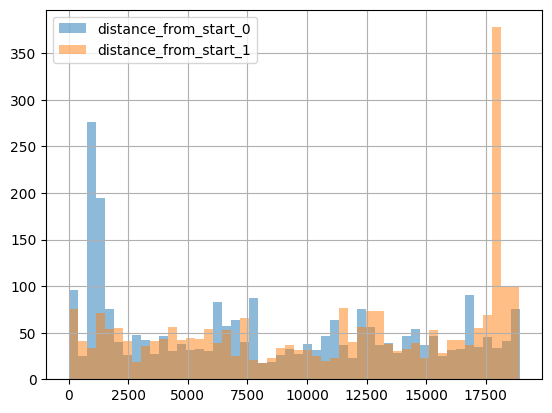

In [202]:
# Plot a histogram of distance_from_start_0 and distance_from_start_1
gps.gps_df["distance_from_start_0"].hist(bins=50, alpha=0.5, label="distance_from_start_0")
gps.gps_df["distance_from_start_1"].hist(bins=50, alpha=0.5, label="distance_from_start_1")
plt.legend()
plt.show()

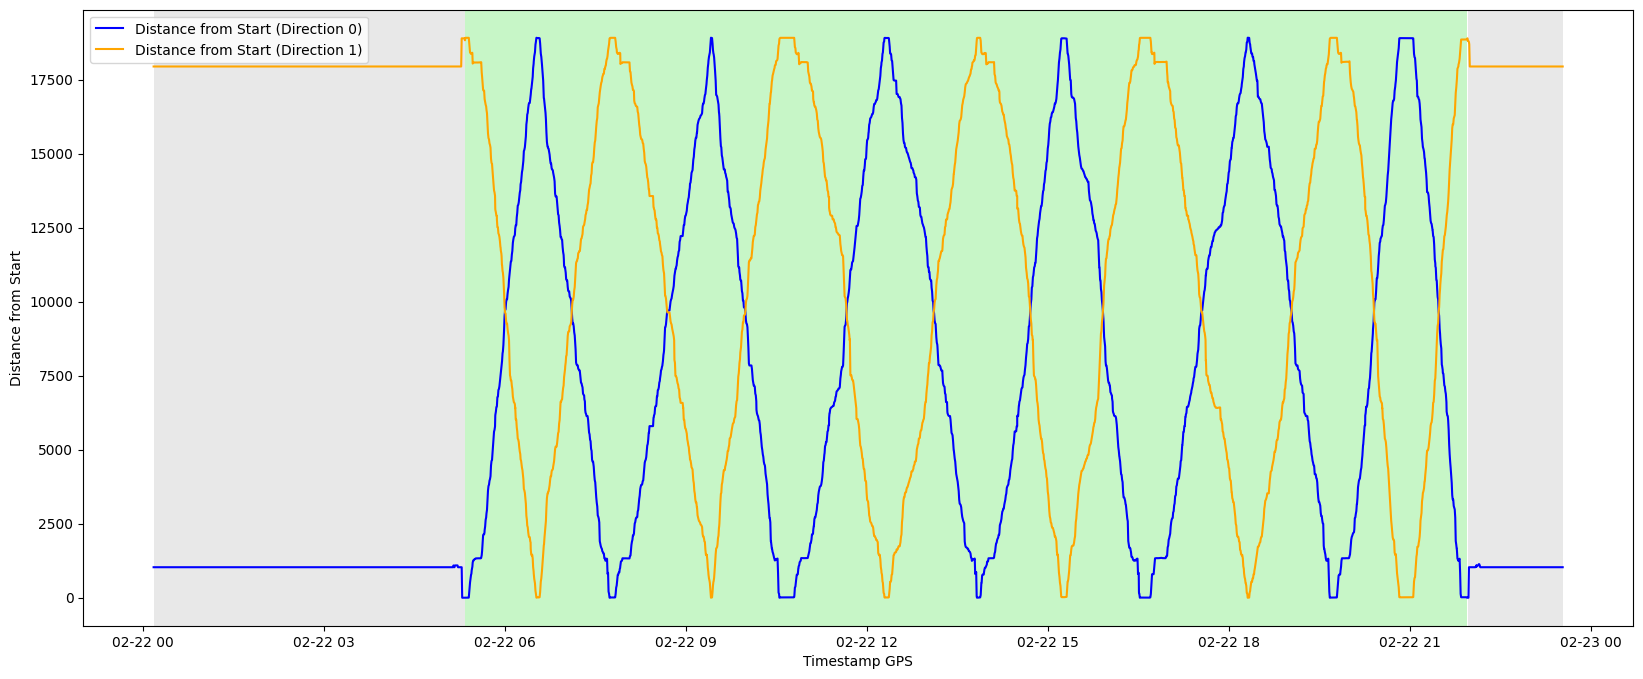

In [203]:
# Assuming gps.gps_df is your DataFrame and it's already loaded
df = gps.gps_df

# Create a new figure and axis
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_from_start_0 = df['distance_from_start_0'].to_numpy()
distance_from_start_1 = df['distance_from_start_1'].to_numpy()

ax.plot(timestamp, distance_from_start_0, label='Distance from Start (Direction 0)', color='blue')
ax.plot(timestamp, distance_from_start_1, label='Distance from Start (Direction 1)', color='orange')

# Get unique values from 'in_route' column and create a colormap
colors = {True: 'lightgreen', False: 'lightgrey'}  # Modify colors as needed

# Group by 'in_route' status and apply coloring
in_route = df['in_route'].to_numpy()

# Find indices where 'in_route' changes
change_indices = np.where(in_route[:-1] != in_route[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(in_route)]))

# Apply coloring to the background based on 'in_route' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[in_route[start]], alpha=0.5)

# Add legend and labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')
ax.legend()

# Show plot
plt.show()

In [204]:
# Assign the direction and direction inference to each GPS point
df['direction'], df['direction_directly_infered'] = utils.assign_direction(df['in_route'].to_numpy(), df['distance_from_start_0'].to_numpy(), df['distance_from_start_1'].to_numpy(), N=3)

df['direction_directly_infered'].value_counts()

direction_directly_infered
True     1522
False    1058
Name: count, dtype: int64

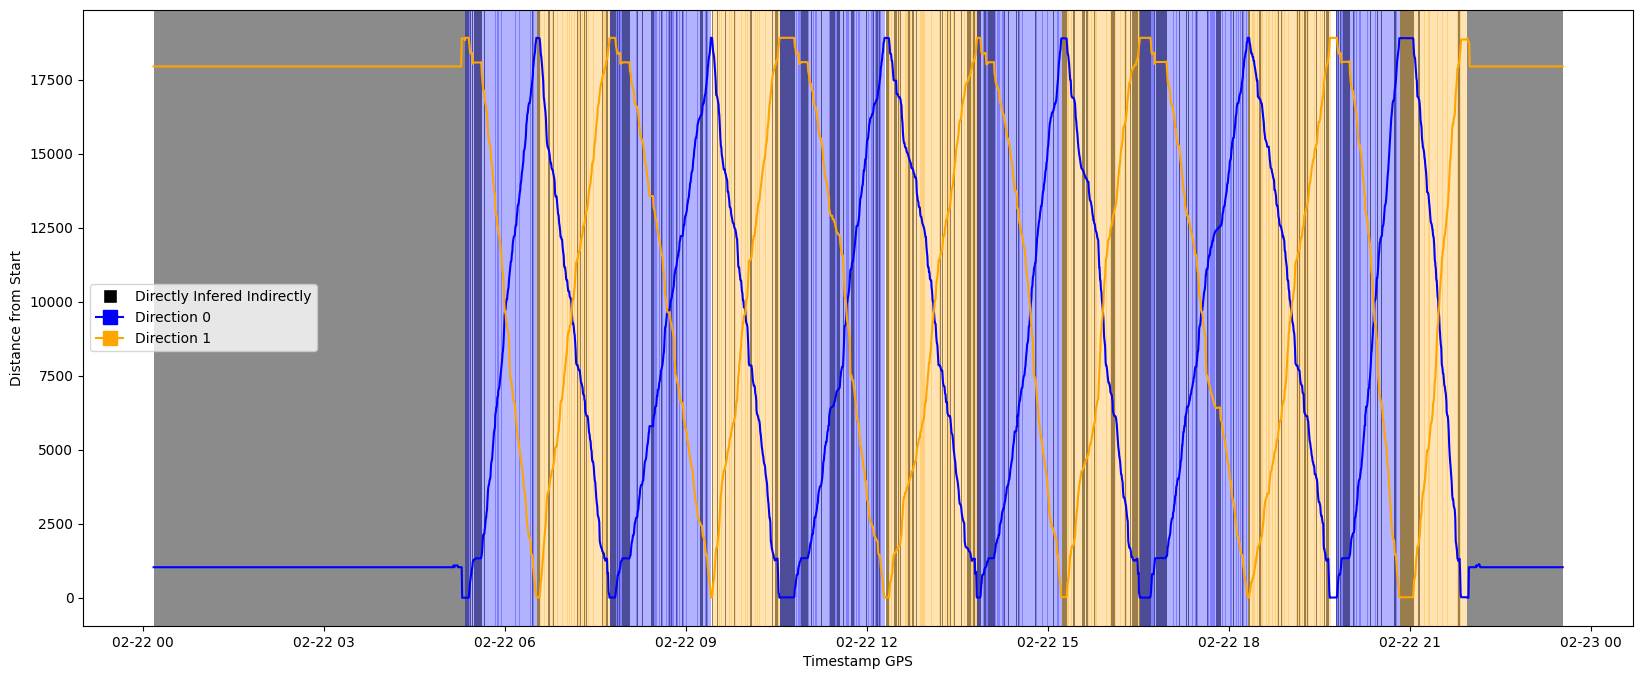

-1: [0:127]
0: [127:298]
1: [298:471]
0: [471:714]
1: [714:882]
0: [882:1120]
1: [1120:1341]
0: [1341:1541]
1: [1541:1746]
0: [1746:1993]
1: [1993:2183]
0: [2183:2349]
1: [2349:2477]
-1: [2477:2580]


In [205]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_from_start_0 = df['distance_from_start_0'].to_numpy()
distance_from_start_1 = df['distance_from_start_1'].to_numpy()

ax.plot(timestamp, distance_from_start_0, label='Distance from Start (Direction 0)', color='blue')
ax.plot(timestamp, distance_from_start_1, label='Distance from Start (Direction 1)', color='orange')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

In [206]:
df['distance_traveled'], df['cumulative_distance_traveled'] = utils.assign_distance_traveled(df['in_route'].to_numpy(), df['direction'].to_numpy(), df['distance_from_start_0'].to_numpy(), df['distance_from_start_1'].to_numpy())

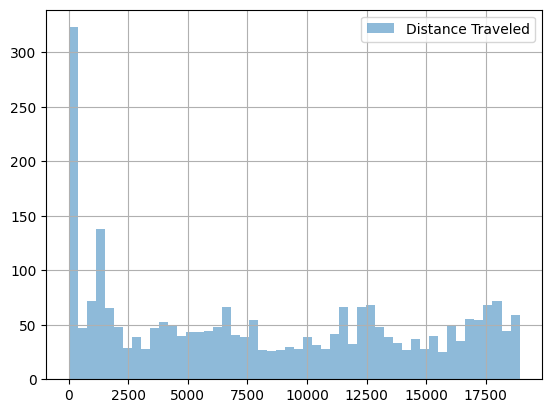

In [207]:
# Plot a histogram of the distance traveled
df['distance_traveled'].hist(bins=50, alpha=0.5, label='Distance Traveled')

plt.legend()
plt.show()

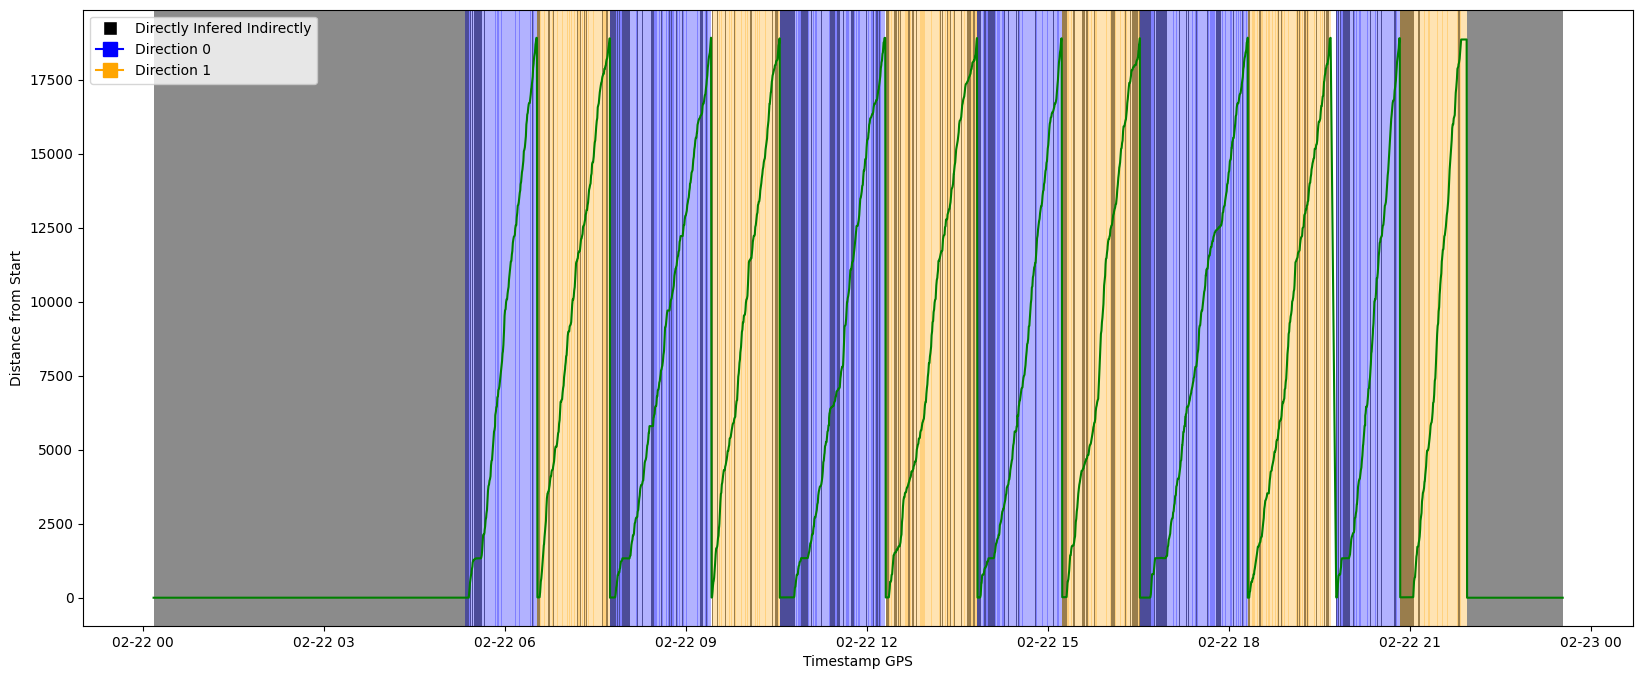

-1: [0:127]
0: [127:298]
1: [298:471]
0: [471:714]
1: [714:882]
0: [882:1120]
1: [1120:1341]
0: [1341:1541]
1: [1541:1746]
0: [1746:1993]
1: [1993:2183]
0: [2183:2349]
1: [2349:2477]
-1: [2477:2580]


In [208]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
distance_traveled = df['distance_traveled'].to_numpy()

ax.plot(timestamp, distance_traveled, label='Distance Traveled', color='green')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

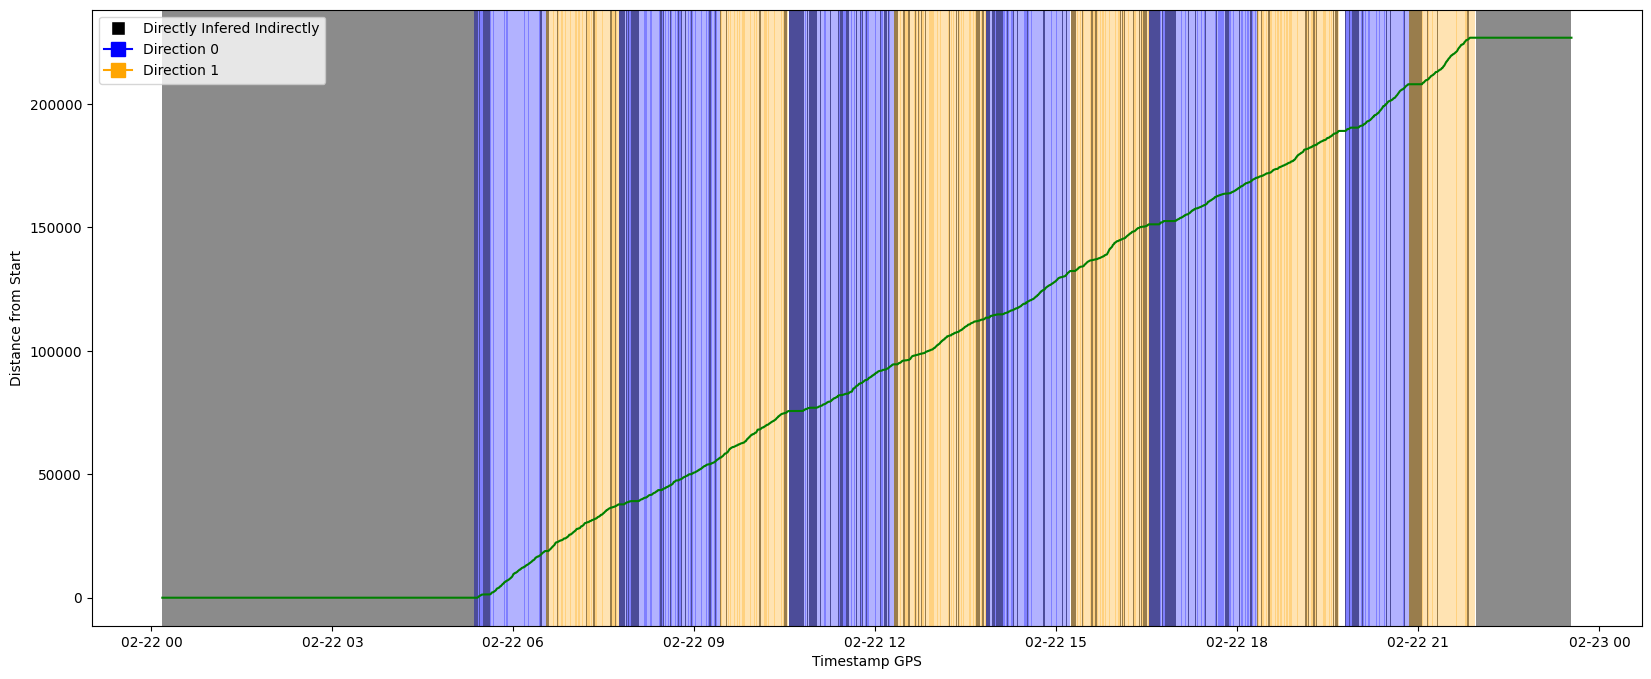

-1: [0:127]
0: [127:298]
1: [298:471]
0: [471:714]
1: [714:882]
0: [882:1120]
1: [1120:1341]
0: [1341:1541]
1: [1541:1746]
0: [1746:1993]
1: [1993:2183]
0: [2183:2349]
1: [2349:2477]
-1: [2477:2580]


In [209]:
# Plot the gps datapoints coloring acording to the 'direction' column(-1, 0 or 1)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Convert timestamp_gps to datetime64 on the datafrmae column
df['timestamp_gps'] = pd.to_datetime(df['timestamp_gps'])

timestamp = df['timestamp_gps'].to_numpy()
cumulative_distance_traveled = df['cumulative_distance_traveled'].to_numpy()

ax.plot(timestamp, cumulative_distance_traveled, label='Cumulative Distance Traveled', color='green')

# Get unique values from 'direction' column and create a colormap
colors = {-1: 'lightgrey', 0: 'blue', 1: 'orange'}  # Modify colors as needed

# Group by 'direction' status and apply coloring
direction = df['direction'].to_numpy()

# Find indices where 'direction' changes
change_indices = np.where(direction[:-1] != direction[1:])[0] + 1

# Include the start and end of the array
change_indices = np.concatenate(([0], change_indices, [len(direction)]))

# Apply coloring to the background based on 'direction' values
for start, end in zip(change_indices[:-1], change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=colors[direction[start]], alpha=0.5)

# Do the same with the direction inference method
direction_directly_infered = df['direction_directly_infered'].to_numpy()
direction_directly_infered_change_indices = np.where(direction_directly_infered[:-1] != direction_directly_infered[1:])[0] + 1
direction_directly_infered_change_indices = np.concatenate(([0], direction_directly_infered_change_indices, [len(direction_directly_infered)]))
direction_directly_infered_colors = {False: 'black', True: 'white'}  # Modify colors as needed

# Add texture to the background based on 'direction_directly_infered' values
for start, end in zip(direction_directly_infered_change_indices[:-1], direction_directly_infered_change_indices[1:]):
    ax.axvspan(timestamp[start], timestamp[end-1], facecolor=direction_directly_infered_colors[direction_directly_infered[start]], alpha=0.4)

# Add labels
ax.set_xlabel('Timestamp GPS')
ax.set_ylabel('Distance from Start')

# Add a custom legend
legend_elements = [plt.Line2D([0], [0], color='w', markerfacecolor='black', marker='s', markersize=10, label='Directly Infered Indirectly'),
                   plt.Line2D([0], [0], color='blue', markerfacecolor='blue', marker='s', markersize=10, label='Direction 0'),
                   plt.Line2D([0], [0], color='orange', markerfacecolor='orange', marker='s', markersize=10, label='Direction 1')]

ax.legend(handles=legend_elements)

# Show plot
plt.show()

# Print the clusters (Value: [StartIndex:EndIndex]) of values inside direction array
for i in range(len(change_indices) - 1):
    print(f"{direction[change_indices[i]]}: [{change_indices[i]}:{change_indices[i+1]}]")

In [210]:
df

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,...,closest_segment_index_0,min_distance_1,closest_segment_index_1,in_route,distance_from_start_0,distance_from_start_1,direction,direction_directly_infered,distance_traveled,cumulative_distance_traveled
0,2024-02-22 00:10:52,2024-02-22,00:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,13,7475.628685,302,False,1030.199951,17942.060547,-1,False,0.0,0.000000
1,2024-02-22 00:40:52,2024-02-22,00:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,13,7475.628685,302,False,1030.199951,17942.060547,-1,False,0.0,0.000000
2,2024-02-22 01:10:52,2024-02-22,01:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,13,7475.628685,302,False,1030.199951,17942.060547,-1,False,0.0,0.000000
3,2024-02-22 01:40:52,2024-02-22,01:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,13,7475.628685,302,False,1030.199951,17942.060547,-1,False,0.0,0.000000
4,2024-02-22 02:10:52,2024-02-22,02:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,13,7475.628685,302,False,1030.199951,17942.060547,-1,False,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2024-02-22 22:31:48,2024-02-22,22:31:48,A71505,409,-22.88893,-43.29271,False,garagem,Parado garagem,...,13,7564.972850,302,False,1030.199951,17942.060547,-1,False,0.0,226781.441406
2576,2024-02-22 22:31:51,2024-02-22,22:31:51,A71505,409,-22.88894,-43.29257,True,garagem,Operando fora trajeto,...,13,7550.873646,302,False,1030.199951,17942.060547,-1,False,0.0,226781.441406
2577,2024-02-22 22:32:14,2024-02-22,22:32:14,A71505,409,-22.88902,-43.29242,True,garagem,Operando fora trajeto,...,13,7532.106406,302,False,1030.199951,17942.060547,-1,False,0.0,226781.441406
2578,2024-02-22 23:02:13,2024-02-22,23:02:13,A71505,409,-22.88903,-43.29244,False,garagem,Parado garagem,...,13,7533.374960,302,False,1030.199951,17942.060547,-1,False,0.0,226781.441406


In [211]:
gtfs.route_stops

,stop_sequence,stop_id,stop_distance,direction_id,shape_id,stop_name,stop_lat,stop_lon,geometry
0,0,2033O00100C0,0.00,0,gnoq,Ponto Final: Saens Peña :: Linha 409,-22.931494,-43.234319,POINT (-43.23432 -22.93149)
57,1,2033O00211C0,354.51,0,gnoq,Hospital Casa Evangélico,-22.929227,-43.231453,POINT (-43.23145 -22.92923)
88,2,2033O00212C0,636.83,0,gnoq,Condomínio Edifício Madri,-22.927700,-43.231800,POINT (-43.23180 -22.92770)
119,3,2033O00177C0,1255.20,0,gnoq,General Roca,-22.924980,-43.233660,POINT (-43.23366 -22.92498)
150,4,2033O00181C0,1715.36,0,gnoq,Saens Peña Medical Center,-22.923610,-43.229666,POINT (-43.22967 -22.92361)
...,...,...,...,...,...,...,...,...,...
3414,54,2033O00198C0,17641.20,1,wrbl,Major Ávila,-22.922590,-43.231930,POINT (-43.23193 -22.92259)
3440,55,2033O00199C0,17864.67,1,wrbl,General Roca,-22.923546,-43.233767,POINT (-43.23377 -22.92355)
3466,56,2033O00206C0,18472.22,1,wrbl,Silva Guimarães,-22.927782,-43.233559,POINT (-43.23356 -22.92778)
3492,57,2033O00209C0,18704.27,1,wrbl,Henry Ford,-22.929797,-43.234198,POINT (-43.23420 -22.92980)


In [212]:
gtfs.get_stops_by_direction()

In [213]:
gtfs.stops_by_direction

[      stop_sequence       stop_id  stop_distance  direction_id shape_id  \
 0                 0  2033O00100C0           0.00             0     gnoq   
 57                1  2033O00211C0         354.51             0     gnoq   
 88                2  2033O00212C0         636.83             0     gnoq   
 119               3  2033O00177C0        1255.20             0     gnoq   
 150               4  2033O00181C0        1715.36             0     gnoq   
 ...             ...           ...            ...           ...      ...   
 1855             59  2028O00018C0       17884.95             0     gnoq   
 1886             60  2028O00019C0       18146.96             0     gnoq   
 1917             61  2028O00020C0       18270.31             0     gnoq   
 1948             62  2028O00021C0       18452.15             0     gnoq   
 1979             63  2028O00001C0       18913.66             0     gnoq   
 
                                  stop_name   stop_lat   stop_lon  \
 0     Ponto Fina

In [214]:
gtfs.stops_distances_by_direction

[array([    0.  ,   354.51,   636.83,  1255.2 ,  1715.36,  1928.52,
         2118.75,  2398.78,  2635.71,  2916.32,  3157.51,  3438.28,
         3780.63,  3932.73,  4297.04,  4616.7 ,  4912.81,  5164.51,
         5607.03,  6227.58,  6441.58,  6816.3 ,  7006.32,  7284.34,
         7478.45,  7700.13,  7991.87,  8236.1 ,  8692.06,  9135.26,
         9394.19,  9695.1 ,  9968.64, 10201.03, 10351.09, 10480.63,
        10888.38, 11053.36, 11473.67, 11659.9 , 12217.91, 12582.09,
        12991.72, 13259.19, 13534.4 , 13728.36, 13986.49, 14338.3 ,
        14801.07, 15187.22, 15439.34, 15701.68, 16017.13, 16321.33,
        16759.65, 16971.07, 17155.34, 17516.3 , 17702.51, 17884.95,
        18146.96, 18270.31, 18452.15, 18913.66]),
 array([    0.  ,   538.15,   648.  ,   765.24,   990.16,  1175.79,
         1400.99,  1594.27,  2047.21,  2394.54,  2656.59,  2948.01,
         3296.92,  3521.03,  3882.85,  4288.67,  4611.26,  4764.49,
         5072.04,  5371.83,  5651.31,  5772.71,  6030.84,  6640.92

In [215]:
df['last_stop_index'], df['next_stop_index'], df['last_stop_distance'], df['next_stop_distance'] = utils.assign_stops(df['in_route'].to_numpy(), df['direction'].to_numpy(), df['distance_traveled'].to_numpy(), gtfs.stops_distances_by_direction)

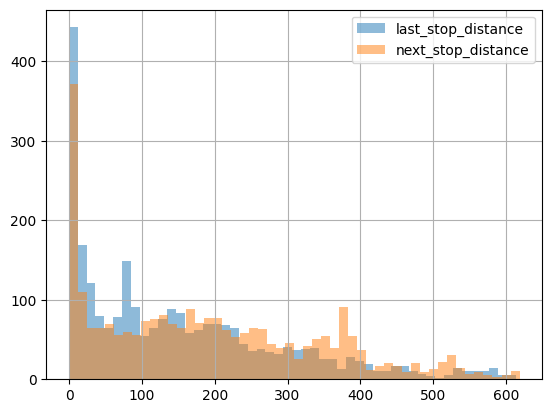

In [216]:
# Plot a histogram of the last_stop_distance and next_stop_distance
df['last_stop_distance'].hist(bins=50, alpha=0.5, label='last_stop_distance')
df['next_stop_distance'].hist(bins=50, alpha=0.5, label='next_stop_distance')

plt.legend()
plt.show()

In [217]:
import src.utils as utils
importlib.reload(utils)


timestamp_array = df['timestamp_gps'].to_numpy()
# Convert timestamp_gps to seconds
timestamp_seconds = (timestamp_array).astype('int64') // 10**9

df['mean_speed_1_min'] = utils.assign_mean_speed(df['in_route'].to_numpy(), timestamp_seconds, df['cumulative_distance_traveled'].to_numpy(), N=1)
df['mean_speed_3_min'] = utils.assign_mean_speed(df['in_route'].to_numpy(), timestamp_seconds, df['cumulative_distance_traveled'].to_numpy(), N=3)
df['mean_speed_5_min'] = utils.assign_mean_speed(df['in_route'].to_numpy(), timestamp_seconds, df['cumulative_distance_traveled'].to_numpy(), N=5)

display(df)

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,...,direction_directly_infered,distance_traveled,cumulative_distance_traveled,last_stop_index,next_stop_index,last_stop_distance,next_stop_distance,mean_speed_1_min,mean_speed_3_min,mean_speed_5_min
0,2024-02-22 00:10:52,2024-02-22,00:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
1,2024-02-22 00:40:52,2024-02-22,00:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
2,2024-02-22 01:10:52,2024-02-22,01:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
3,2024-02-22 01:40:52,2024-02-22,01:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
4,2024-02-22 02:10:52,2024-02-22,02:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2024-02-22 22:31:48,2024-02-22,22:31:48,A71505,409,-22.88893,-43.29271,False,garagem,Parado garagem,...,False,0.0,226781.441406,-1,-1,-1.0,-1.0,0.0,0.0,0.0
2576,2024-02-22 22:31:51,2024-02-22,22:31:51,A71505,409,-22.88894,-43.29257,True,garagem,Operando fora trajeto,...,False,0.0,226781.441406,-1,-1,-1.0,-1.0,0.0,0.0,0.0
2577,2024-02-22 22:32:14,2024-02-22,22:32:14,A71505,409,-22.88902,-43.29242,True,garagem,Operando fora trajeto,...,False,0.0,226781.441406,-1,-1,-1.0,-1.0,0.0,0.0,0.0
2578,2024-02-22 23:02:13,2024-02-22,23:02:13,A71505,409,-22.88903,-43.29244,False,garagem,Parado garagem,...,False,0.0,226781.441406,-1,-1,-1.0,-1.0,0.0,0.0,0.0


In [218]:
mean_speeds = df[['mean_speed_1_min', 'mean_speed_3_min', 'mean_speed_5_min']].to_numpy()

df_validation = utils.virtualize_stop_points(df['timestamp_gps'].to_numpy(), df['in_route'].to_numpy(), df['direction'].to_numpy(), df['last_stop_index'].to_numpy(), df['next_stop_index'].to_numpy(), df['distance_traveled'].to_numpy(), df['cumulative_distance_traveled'].to_numpy(), mean_speeds, gtfs.stops_distances_by_direction, VEHICLE, ROUTE)

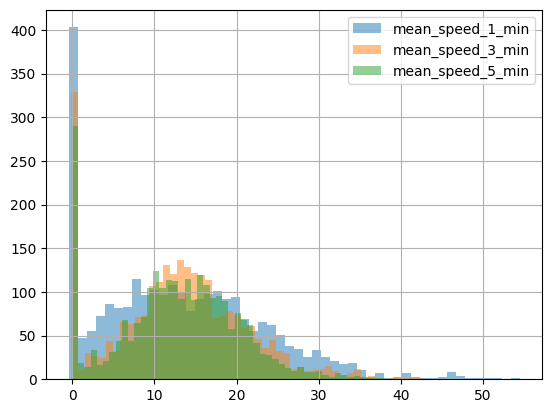

In [219]:
# Generate a histogram of mean_speed_1_min, mean_speed_3_min and mean_speed_5_min
df['mean_speed_1_min'].hist(bins=50, alpha=0.5, label='mean_speed_1_min')
df['mean_speed_3_min'].hist(bins=50, alpha=0.5, label='mean_speed_3_min')
df['mean_speed_5_min'].hist(bins=50, alpha=0.5, label='mean_speed_5_min')

plt.legend()
plt.show()

In [220]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(df)

display(df)

,timestamp_gps,data,hora,id_veiculo,servico,latitude,longitude,flag_em_movimento,tipo_parada,status,...,direction_directly_infered,distance_traveled,cumulative_distance_traveled,last_stop_index,next_stop_index,last_stop_distance,next_stop_distance,mean_speed_1_min,mean_speed_3_min,mean_speed_5_min
0,2024-02-22 00:10:52,2024-02-22,00:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
1,2024-02-22 00:40:52,2024-02-22,00:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
2,2024-02-22 01:10:52,2024-02-22,01:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
3,2024-02-22 01:40:52,2024-02-22,01:40:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
4,2024-02-22 02:10:52,2024-02-22,02:10:52,A71505,409,-22.88941,-43.29206,False,garagem,Parado garagem,...,False,0.0,0.000000,-1,-1,-1.0,-1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,2024-02-22 22:31:48,2024-02-22,22:31:48,A71505,409,-22.88893,-43.29271,False,garagem,Parado garagem,...,False,0.0,226781.441406,-1,-1,-1.0,-1.0,0.0,0.0,0.0
2576,2024-02-22 22:31:51,2024-02-22,22:31:51,A71505,409,-22.88894,-43.29257,True,garagem,Operando fora trajeto,...,False,0.0,226781.441406,-1,-1,-1.0,-1.0,0.0,0.0,0.0
2577,2024-02-22 22:32:14,2024-02-22,22:32:14,A71505,409,-22.88902,-43.29242,True,garagem,Operando fora trajeto,...,False,0.0,226781.441406,-1,-1,-1.0,-1.0,0.0,0.0,0.0
2578,2024-02-22 23:02:13,2024-02-22,23:02:13,A71505,409,-22.88903,-43.29244,False,garagem,Parado garagem,...,False,0.0,226781.441406,-1,-1,-1.0,-1.0,0.0,0.0,0.0


In [221]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # display(df_validation)

display(df_validation)

,timestamp_gps,data,hora,id_veiculo,servico,direction,cumulative_distance_traveled,current_stop_index,next_stop_distance,mean_speed_1_min,mean_speed_3_min,mean_speed_5_min
0,2024-02-22 05:25:06.738839871,2024-02-22,05:25:06,A71505,409,0,354.510000,1,282.32,26.685725,6.757550,5.192300
1,2024-02-22 05:26:01.323142189,2024-02-22,05:26:01,A71505,409,0,636.830000,2,618.37,20.740064,8.207430,7.640470
2,2024-02-22 05:28:40.450139514,2024-02-22,05:28:40,A71505,409,0,1255.200000,3,460.16,13.429169,14.182936,10.250478
3,2024-02-22 05:37:49.294441630,2024-02-22,05:37:49,A71505,409,0,1715.360000,4,213.16,20.987434,9.138478,5.749326
4,2024-02-22 05:38:13.443899364,2024-02-22,05:38:13,A71505,409,0,1928.520000,5,190.23,31.862373,13.951381,8.752109
...,...,...,...,...,...,...,...,...,...,...,...,...
709,2024-02-22 21:46:22.988568871,2024-02-22,21:46:22,A71505,409,1,225168.808672,53,399.53,33.517626,25.570603,25.012078
710,2024-02-22 21:47:11.839668741,2024-02-22,21:47:11,A71505,409,1,225568.338672,54,223.47,32.508935,30.624352,23.214994
711,2024-02-22 21:47:32.000056148,2024-02-22,21:47:32,A71505,409,1,225791.808672,55,607.55,22.456875,30.269329,22.173522
712,2024-02-22 21:50:17.300872088,2024-02-22,21:50:17,A71505,409,1,226399.358672,56,232.05,29.929688,15.797709,22.829595


In [222]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    # display(df)